# Sandbox notebook for small examples and illustrations

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from __future__ import division
%matplotlib notebook

## Poincaré map for oscillator example


In [3]:
def plot_cobweb(f, x0, nmax=40):
    """Make a cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0.

    """
    x = np.linspace(0, 1, 500)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x), c='#444444', lw=2)
    ax.plot(x, x,'--', c='#444444', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1])
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)

<IPython.core.display.Javascript object>


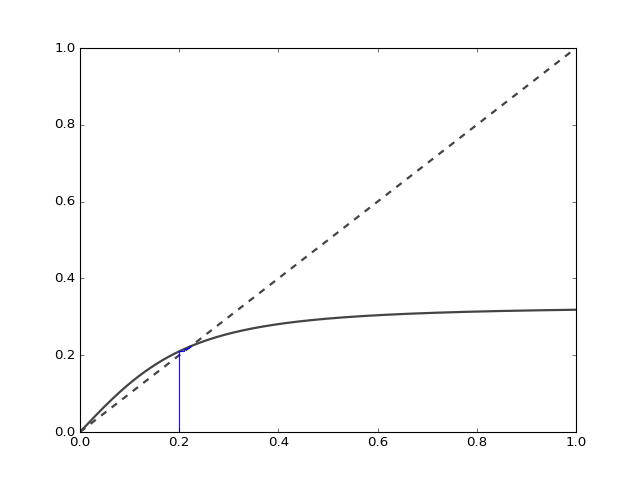

/Users/guillaume/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


<IPython.core.display.Javascript object>


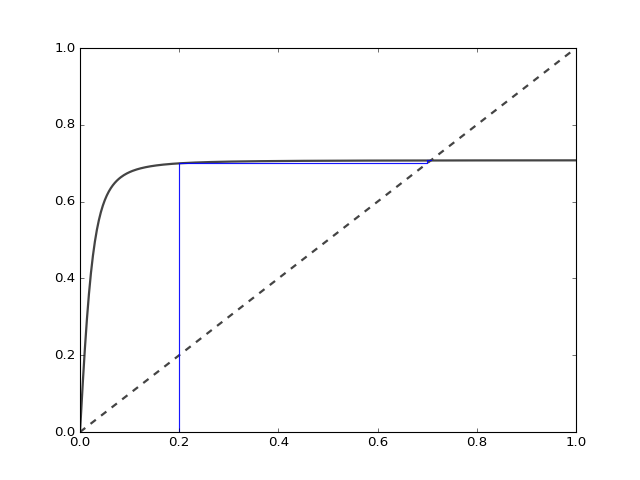

In [4]:
# poincare map
def P(r,mu): 
    return 1/np.sqrt(1/mu+(1/(r**2)-1/mu)*np.exp(-4*np.pi*mu))

mu = 0.05
func = lambda x : P(x,mu)
plot_cobweb(func, [0.2])

mu = 0.5
func = lambda x : P(x,mu)
plot_cobweb(func, [0.2])

## Isochron example

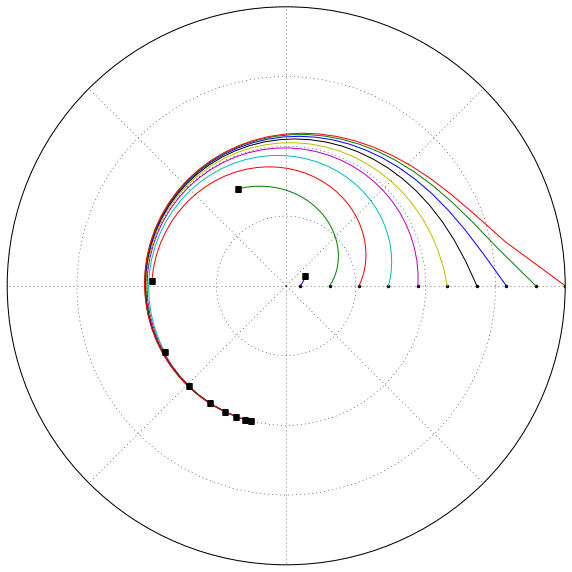

In [5]:
# import widget things
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

# vector field
def VF(R,phi):
    return (1-R)*R**2,R

# isochron
def theta(R,c=0):
    return c+1/R-1

# integration
num_steps = 100
dt = 0.1

IC = [[x,0] for x in np.linspace(0.1,2,10)]
# IC = [[x,theta(x)] for x in np.linspace(0.1,2,10)]
traj = np.ndarray([len(IC),num_steps,2])

for i,ic in enumerate(IC):
    traj[i,0,:] = ic  
    for t in range(num_steps-1):
        traj[i,t+1,:] = traj[i,t,:]+dt*np.array(VF(traj[i,t,0],traj[i,t,1]))
    
    
# plot function
def plot_func(step):
    step = int(step)
    fig= plt.figure(figsize=(15,10));
    ax = plt.subplot(111, projection='polar');
    for i,ic in enumerate(IC):
        ax.plot(ic[1],ic[0],'k.');
        ax.plot(traj[i,:step,1],traj[i,:step,0]);
    for i,ic in enumerate(IC):
        ax.plot(traj[i,step-1,1],traj[i,step-1,0],'ks');
    ax.set_yticklabels([]);
    ax.set_xticklabels([]);



interact(plot_func, step = widgets.FloatSlider(value=0,
                                               min=1,
                                               max=num_steps-1,
                                               step=10));
